In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##### tgl 28 jam 12 malam

In [12]:
demo = pd.read_csv('county_facts.csv')
demoo =  pd.read_csv('county_facts.csv')
pri = pd.read_csv('primary_results.csv')

In [13]:
demo = demo[['fips','area_name','state_abbreviation','PST045214','RHI225214',
                             'RHI725214','RHI325214','RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210',
                             'VET605213','HSD410213','NES010213','SBO315207','SBO215207','SBO415207','SBO015207','INC910213']]
demo.rename(columns={'PST045214': 'Population','RHI225214':'Black','RHI725214':'Latino','RHI325214':'AmericanIndian',
                            'RHI825214':'White','EDU635213':'HighSchool','EDU685213':'Bachelors',
                             'INC110213':'MediHouseInc','PVY020213':'Kurang Mampu','POP060210':'Density','VET605213':'Veteran',
                            'HSD410213':'Rumah Tangga','NES010213':'Pengangguran','SBO315207':'BlackownFirm','SBO215207':'AsianowmFirm',
                            'SBO415207':'LatinoownFirm','SBO015207':'WomenownFirm','INC910213':'incomepercapita'}, inplace=True)
for col in demo.columns: 
    print(col) 

fips
area_name
state_abbreviation
Population
Black
Latino
AmericanIndian
White
HighSchool
Bachelors
MediHouseInc
Kurang Mampu
Density
Veteran
Rumah Tangga
Pengangguran
BlackownFirm
AsianowmFirm
LatinoownFirm
WomenownFirm
incomepercapita


In [14]:
#Reading Results CSV File
results = pd.read_csv('primary_results.csv')
results = results[results.party == "Republican"]
# results = results[(results.state != "Maine") & (results.state != "Massachusetts") & (results.state != "Vermont") & (results.state != "Illinois") ]
# results = results[(results.candidate != 'No Preference') & (results.candidate != ' Uncommitted')]
results = results[(results.candidate == "Donald Trump") | (results.candidate != "Donald Trump") ]
Rep = results
Rep.candidate.unique()

array(['Ben Carson', 'Donald Trump', 'John Kasich', 'Marco Rubio',
       'Ted Cruz', 'Carly Fiorina', 'Chris Christie', 'Jeb Bush',
       'Mike Huckabee', 'Rand Paul', 'Rick Santorum'], dtype=object)

In [15]:
#Calculating statewise total votes and fraction votes (Republic)
votesByState = [[candidate, state, party] for candidate in Rep.candidate.unique() for state in Rep.state.unique() 
                for party in Rep.party.unique()]
for i in votesByState:
    i.append(Rep[(Rep.candidate == i[0]) & (Rep.state == i[1])].votes.sum())
    i.append(i[3]*1.0/Rep[Rep.state == i[1]].votes.sum())
vbs = pd.DataFrame(votesByState, columns = ['candidate', 'state', 'party', 'votes','partyFrac'])


In [16]:
# allData = pd.merge(vbs, demo, how="inner", left_on = 'state',right_on = 'area_name')
# # allData.corr()['partyFrac']
# # allData.dropna()
# # allData.area_name.unique()
# allData

In [17]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# allData['state1']= le.fit_transform (allData['state'])
# allData.head()

In [18]:
# demo['state1']= le.fit_transform (demo['area_name'])
# demo.head()

In [19]:
#Merging demographics and results
allData = pd.merge(vbs, demo, how="inner", left_on = 'state',right_on = 'area_name')
allData.drop('state_abbreviation',axis=1, inplace=True)
allData.head()
# #Segregate data candidate wise
DNT = allData[(allData.candidate == "Donald Trump")] #| (allData.candidate != "Donald Trump")]
DNT = DNT.reset_index();
DNT.drop('index',axis=1, inplace=True)
allData

,candidate,state,party,votes,partyFrac,fips,area_name,Population,Black,Latino,...,Kurang Mampu,Density,Veteran,Rumah Tangga,Pengangguran,BlackownFirm,AsianowmFirm,LatinoownFirm,WomenownFirm,incomepercapita
0,Ben Carson,Alabama,Republican,87517,0.104481,1000,Alabama,4849377,26.7,4.1,...,18.6,94.4,388865,1838683,311578,14.8,1.8,1.2,28.1,23680
1,Donald Trump,Alabama,Republican,371735,0.443793,1000,Alabama,4849377,26.7,4.1,...,18.6,94.4,388865,1838683,311578,14.8,1.8,1.2,28.1,23680
2,John Kasich,Alabama,Republican,37970,0.045330,1000,Alabama,4849377,26.7,4.1,...,18.6,94.4,388865,1838683,311578,14.8,1.8,1.2,28.1,23680
3,Marco Rubio,Alabama,Republican,159802,0.190778,1000,Alabama,4849377,26.7,4.1,...,18.6,94.4,388865,1838683,311578,14.8,1.8,1.2,28.1,23680
4,Ted Cruz,Alabama,Republican,180608,0.215617,1000,Alabama,4849377,26.7,4.1,...,18.6,94.4,388865,1838683,311578,14.8,1.8,1.2,28.1,23680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Chris Christie,Wyoming,Republican,0,0.000000,56000,Wyoming,584153,1.6,9.8,...,11.5,5.8,50852,222846,46297,0.2,0.7,2.8,25.5,28902
502,Jeb Bush,Wyoming,Republican,0,0.000000,56000,Wyoming,584153,1.6,9.8,...,11.5,5.8,50852,222846,46297,0.2,0.7,2.8,25.5,28902
503,Mike Huckabee,Wyoming,Republican,0,0.000000,56000,Wyoming,584153,1.6,9.8,...,11.5,5.8,50852,222846,46297,0.2,0.7,2.8,25.5,28902
504,Rand Paul,Wyoming,Republican,0,0.000000,56000,Wyoming,584153,1.6,9.8,...,11.5,5.8,50852,222846,46297,0.2,0.7,2.8,25.5,28902


In [21]:
#Select X for Prediction
feature_cols = ['Population','Black','Latino','White','HighSchool','Bachelors','MediHouseInc','Kurang Mampu','Density','Veteran',
                'Rumah Tangga','Pengangguran','AsianowmFirm','LatinoownFirm','WomenownFirm','incomepercapita']
X = DNT[feature_cols]

#Select y for Prediction
y = DNT.partyFrac

# #Initializing Liner Regression and Random Forest
# rf1 = RandomForestRegressor(n_estimators=10000)
# #Train Model
# rf1.fit(X,y)


In [127]:
# model.fit(X, y)
# print("slope m = ", model.coef_)
# print("intercept c = ", model.intercept_)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
# model.score(x_test, y_test)

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

## Model

In [28]:
modela = LinearRegression()
modelb = Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, random_state=None, solver='auto', tol=0.001)
modelc = Lasso(max_iter=100000)
modeld = ElasticNet(max_iter=100000)

modela.fit(x_train,y_train)
modelb.fit(x_train,y_train)
modelc.fit(x_train,y_train)
modeld.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## Linear Regression

Text(0, 0.5, 'Predictions')

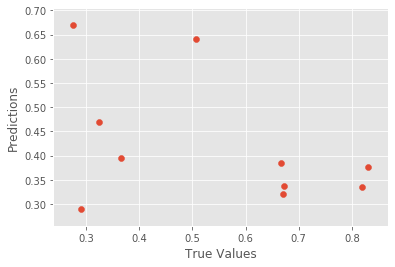

In [57]:
m = modeld.fit(x_train,y_train)
p = modeld.predict(x_test)
plt.scatter(y_test, p)
plt.xlabel('True Values')
plt.ylabel('Predictions')


In [60]:
print (modeld.score(x_test, y_test))

-1.2476163745120235


In [52]:
demo1=demo[(demo.area_name=='Delaware')]
demo2=demo[(demo.area_name=='Connecticut')]
demo3=demo[(demo.area_name=='Maryland')]
demo4=demo[(demo.area_name=='Delaware')]
demo5=demo[(demo.area_name=='New York')]

## Elastic Net

In [61]:
# X_test1=demo2[feature_cols]
# y_pred4=modeld.predict(X_test1)
# xx=np.array(y_pred4);

# X_test1=demo3[feature_cols]
# y_pred4=modeld.predict(X_test1)
# xx = np.append(xx, y_pred4[0]);

# X_test1=demo3[feature_cols]
# y_pred4=modeld.predict(X_test1)
# xx=np.append(xx, y_pred4[0]);

# X_test1=demo4[feature_cols]
# y_pred4=modeld.predict(X_test1)
# xx=np.append(xx, y_pred4[0]);

# X_test1=demo5[feature_cols]
# y_pred4=modeld.predict(X_test1)
# xx=np.append(xx, y_pred4[0]);

X_test1=modeld.predict(x_test)
y_pred4=modeld.predict(y_test)
xx = np.array(xx, y_pred4[0]);


ValueError: Expected 2D array, got 1D array instead:
array=[0.50647341 0.67295304 0.290212   0.67087339 0.81963867 0.27678091
 0.83048082 0.36548388 0.66614291 0.32503791].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
pred =pd.Series(xx, index=['Connecticut','Maryland']) 
x1 = np.array([0.590,0.565])
real = pd.Series(x1, index=['Connecticut','Maryland'])

In [35]:
# pred =pd.Series(xx, index=['Alaska','Connecticut','Maryland','Delaware','New York']) 
# x1 = np.array([.33,.59,.56,.62,.60])
# real = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Delaware','New York'])

             Predicted   Real
Connecticut    0.63687  0.590
Maryland       0.55974  0.565


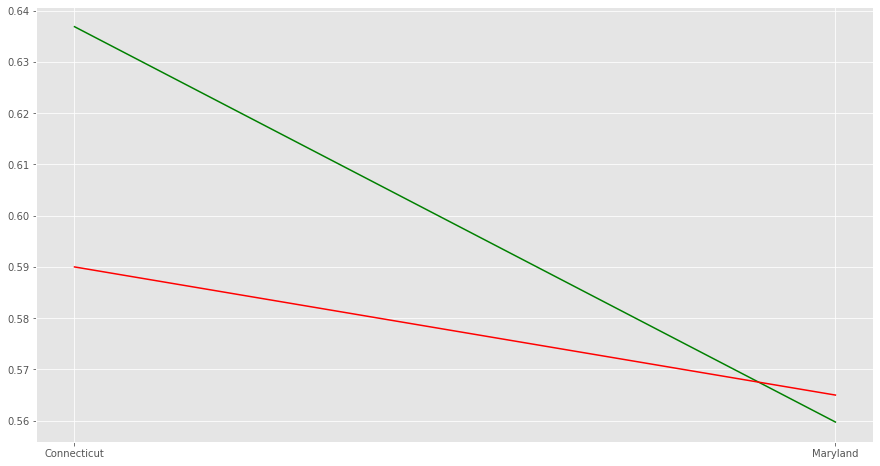

In [50]:
e = {'Predicted' : pred,'Real' : real}
final=pd.DataFrame(e)
print(final)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred,'g')  # Pred
plt.plot(real,'r') # Real
plt.show()

In [226]:
a = DNT[(DNT.state == 'Maryland')]
a = a['partyFrac'].mean()
a

0.5650698507462687

In [43]:
# print(np.sqrt(mean_squared_error(a,b)))
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score


print(f'MAX ERROR : {round(max_error(pred,real),3)*100}')
print(f'MSE : {round(mse(pred,real),5)} ')
print(f'MAE : {round(mae(pred,real),3)*100} ')
print(f'MDAE : {round(mdae(pred,real),3)*100} ')
print(f'RMSLE : {round(np.sqrt(msle(pred,real)),3)*100} ')
print(f'R2 Score : {round(r2_score(pred,real),3)*100} ')

MAX ERROR : 4.7
MSE : 0.00111 
MAE : 2.6 
MDAE : 2.6 
RMSLE : 2.1 
R2 Score : 25.2 


### Lasso

In [38]:
X_test2=demo1[feature_cols]
y_pred2=modelb.predict(X_test2)
xx2=np.array(y_pred2);

X_test2=demo2[feature_cols]
y_pred2=modelb.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo3[feature_cols]
y_pred2=modelb.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo4[feature_cols]
y_pred2=modelb.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

X_test2=demo5[feature_cols]
y_pred2=modelb.predict(X_test2)
xx2=np.append(xx2, y_pred2[0]);

In [39]:
pred2 =pd.Series(xx2, index=['Alaska','Connecticut','Maryland','Delaware','New York']) 
x1 = np.array([.33,.59,.56,.62,.60])
real2 = pd.Series(x1, index=['Alaska','Connecticut','Maryland','Delaware','New York'])

             Predicted   Real
Connecticut    0.63687  0.590
Maryland       0.55974  0.565


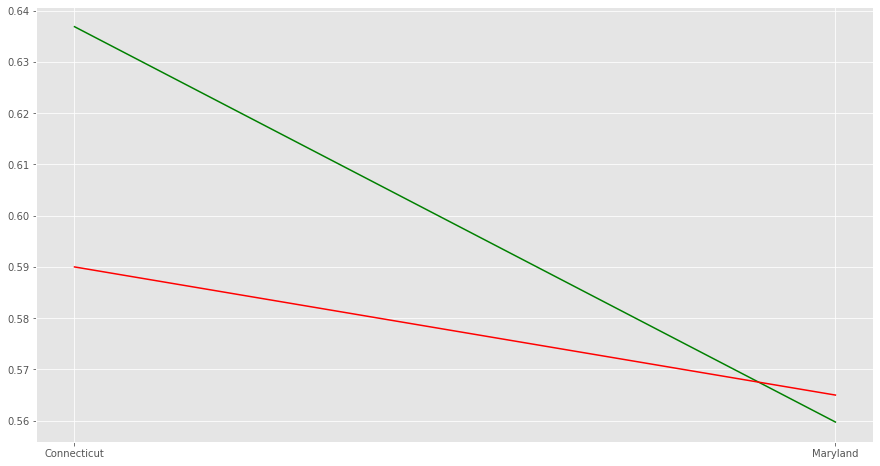

In [40]:
f = {'Predicted' : pred2,'Real' : real2}
final2=pd.DataFrame(e)
print(final2)
# print("Error=",end='')
# print(error3)
# print("MaxError=",end='')
# print(error4)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(pred,'g')  # Pred
plt.plot(real,'r') # Real
plt.show()


In [42]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score

print(f'MAX ERROR : {round(max_error(pred2,real2),2)*100} %')
print(f'MSE : {(round(mse(pred2,real2),3))*100} %')
print(f'RMSE : {np.sqrt(round(mse(pred2,real2),3)*100)} %')
print(f'MAE : {round(mae(pred2,real2),2)*100} %')
print(f'MDAE : {round(mdae(pred2,real2),2)*100} %')
print(f'RMSLE : {round(np.sqrt(msle(pred2,real2)),3)*100} %')
print(f'R2 Score : {round(r2_score(pred2,real2),2)*100} %')

MAX ERROR : 20.0 %
MSE : 1.0999999999999999 %
RMSE : 1.0488088481701514 %
MAE : 7.000000000000001 %
MDAE : 5.0 %
RMSLE : 6.800000000000001 %
R2 Score : -28.000000000000004 %


In [44]:
print ("Future Pedictions - Donald Trump")

#Select Future States 
#Change name of state for other states
demo11=demo[(demo.area_name=='Alaska')]
demo12=demo[(demo.area_name=='Washington')]
demo13=demo[(demo.area_name=='Texas')]
demo14=demo[(demo.area_name=='Colorado')]
demo15=demo[(demo.area_name=='Florida')]
demo16=demo[(demo.area_name=='Michigan')]
demo17=demo[(demo.area_name=='Missouri')]
demo18=demo[(demo.area_name=='Oregon')]


X_test1=demo11[feature_cols]
y_pred4=modeld.predict(X_test1)
print (f'Alaska = {(round((y_pred4[0])*100))} %')

X_test1=demo12[feature_cols]
y_pred4=modeld.predict(X_test1)
print (f'Washington = {(round((y_pred4[0])*100))} %')

X_test1=demo13[feature_cols]
y_pred4=modeld.predict(X_test1)
print (f'Texas = {(round((y_pred4[0])*100))} %')

X_test1=demo14[feature_cols]
y_pred4=modeld.predict(X_test1)
print (f'Colorado = {(round((y_pred4[0])*100))} %')

X_test1=demo15[feature_cols]
y_pred4=modeld.predict(X_test1)
print (f'Florida = {(round((y_pred4[0])*100))} %')

X_test1=demo16[feature_cols]
y_pred4=modeld.predict(X_test1)
print (f'Michigan = {(round((y_pred4[0])*100))} %')

X_test1=demo17[feature_cols]
y_pred4=modeld.predict(X_test1)
print (f'Missouri = {(round((y_pred4[0])*100))} %')

X_test1=demo18[feature_cols]
y_pred4=modeld.predict(X_test1)
# print("Oregon = ",end='')
print (f'Oregon = {(round((y_pred4[0])*100))} %')


Future Pedictions - Donald Trump
Alaska = 28.0 %
Washington = 46.0 %
Texas = 67.0 %
Colorado = 38.0 %
Florida = 42.0 %
Michigan = 42.0 %
Missouri = 40.0 %
Oregon = 38.0 %


In [168]:
a = DNT[(DNT.state == 'Alaska')]
a = a['partyFrac'].mean()
a

0.3349749202006384

In [167]:
demo11

,fips,area_name,state_abbreviation,Population,Black,Latino,White,HighSchool,Bachelors,Income,Kurang Mampu,Density
69,2000,Alaska,NaN,736732,3.9,6.8,61.9,91.6,27.5,70760,9.9,1.2
